In [13]:
import pandas as pd

In [49]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [50]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [51]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [52]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps', 'Insulin', 'BMI', 'Pedigree']

In [53]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max()-x.min()))

In [54]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [55]:
import tensorflow as tf

In [56]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [57]:
number_pregnant = tf.feature_column.numeric_column('Number_pregnant')
glucose_concentration = tf.feature_column.numeric_column('Glucose_concentration')
blood_pressure = tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [58]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A', 'B', 'C', 'D'])

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

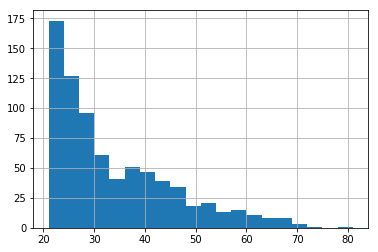

In [60]:
diabetes['Age'].hist(bins=20)

In [61]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [62]:
feat_cols = [number_pregnant, glucose_concentration, blood_pressure, triceps,
            insulin, bmi, pedigree, age]

In [63]:
x_data = diabetes.drop('Class', axis=1)

In [64]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [65]:
labels = diabetes['Class']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.3, random_state =101 )

In [69]:
input_func = tf.estimator.inputs.pandas_input_fn(x = x_train, y= y_train,
                                                batch_size = 10, num_epochs=1000,
                                                shuffle = True)

In [70]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ASUSPC~1\\AppData\\Local\\Temp\\tmp9rssk82o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024785A5D9B0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [80]:
model.train(input_fn=input_func, steps =1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\ASUSPC~1\AppData\Local\Temp\tmp9rssk82o\model.ckpt-2000
INFO:tensorflow:Saving checkpoints for 2001 into C:\Users\ASUSPC~1\AppData\Local\Temp\tmp9rssk82o\model.ckpt.
INFO:tensorflow:loss = 4.19879, step = 2001
INFO:tensorflow:global_step/sec: 121.346
INFO:tensorflow:loss = 5.195, step = 2101 (0.847 sec)
INFO:tensorflow:global_step/sec: 162.201
INFO:tensorflow:loss = 6.4261, step = 2201 (0.625 sec)
INFO:tensorflow:global_step/sec: 153.644
INFO:tensorflow:loss = 4.35857, step = 2301 (0.645 sec)
INFO:tensorflow:global_step/sec: 154.099
INFO:tensorflow:loss = 6.79147, step = 2401 (0.643 sec)
INFO:tensorflow:global_step/sec: 157.111
INFO:tensorflow:loss = 4.06856, step = 2501 (0.640 sec)
INFO:tensorflow:global_step/sec: 158.649
INFO:tensorflow:loss = 6.94456, step = 2601 (0.630 sec)
INFO:tensorflow:global_step/sec: 186.172
INFO:tensorflow:loss = 5.64072, step = 2701 (0.526 sec)
INFO:tensorflow:glo

In [81]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test, y = y_test, batch_size=10
                                                     ,num_epochs=1, shuffle=False)

In [82]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-12-20-06:48:44
INFO:tensorflow:Restoring parameters from C:\Users\ASUSPC~1\AppData\Local\Temp\tmp9rssk82o\model.ckpt-3000
INFO:tensorflow:Finished evaluation at 2017-12-20-06:48:47
INFO:tensorflow:Saving dict for global step 3000: accuracy = 0.753247, accuracy_baseline = 0.649351, auc = 0.807901, auc_precision_recall = 0.674232, average_loss = 0.538489, global_step = 3000, label/mean = 0.350649, loss = 5.18295, prediction/mean = 0.36072


In [83]:
results

{'accuracy': 0.75324672,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80790126,
 'auc_precision_recall': 0.67423189,
 'average_loss': 0.53848881,
 'global_step': 3000,
 'label/mean': 0.35064936,
 'loss': 5.1829543,
 'prediction/mean': 0.36071953}

In [85]:
pred_input_function = tf.estimator.inputs.pandas_input_fn(x = x_test, batch_size=10,
                                                         num_epochs=1, shuffle=False)

In [86]:
prediction = model.predict(pred_input_function)

In [87]:
my_pred = list(prediction)

INFO:tensorflow:Restoring parameters from C:\Users\ASUSPC~1\AppData\Local\Temp\tmp9rssk82o\model.ckpt-3000


In [88]:
my_pred

[{'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.30236849], dtype=float32),
  'logits': array([-0.83604455], dtype=float32),
  'probabilities': array([ 0.69763154,  0.30236852], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.54203176], dtype=float32),
  'logits': array([ 0.16852474], dtype=float32),
  'probabilities': array([ 0.45796826,  0.54203176], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.27851805], dtype=float32),
  'logits': array([-0.95182455], dtype=float32),
  'probabilities': array([ 0.72148198,  0.27851805], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.32955498], dtype=float32),
  'logits': array([-0.71019852], dtype=float32),
  'probabilities': array([ 0.67044502,  0.32955498], dtype=flo

In [89]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols,
                                      n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ASUSPC~1\\AppData\\Local\\Temp\\tmpvxgia_38', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002478893AB70>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [102]:
dnn_model.train(input_fn= input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\ASUSPC~1\AppData\Local\Temp\tmpvxgia_38\model.ckpt-2108
INFO:tensorflow:Saving checkpoints for 2109 into C:\Users\ASUSPC~1\AppData\Local\Temp\tmpvxgia_38\model.ckpt.
INFO:tensorflow:loss = 5.308, step = 2109
INFO:tensorflow:Saving checkpoints for 2162 into C:\Users\ASUSPC~1\AppData\Local\Temp\tmpvxgia_38\model.ckpt.
INFO:tensorflow:Loss for final step: 3.8329.


In [103]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test, y = y_test, batch_size=10
                                                     ,num_epochs=1, shuffle=True)

In [104]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-12-20-08:14:57
INFO:tensorflow:Restoring parameters from C:\Users\ASUSPC~1\AppData\Local\Temp\tmpvxgia_38\model.ckpt-2162
INFO:tensorflow:Finished evaluation at 2017-12-20-08:15:00
INFO:tensorflow:Saving dict for global step 2162: accuracy = 0.692641, accuracy_baseline = 0.649351, auc = 0.807243, auc_precision_recall = 0.643131, average_loss = 0.559352, global_step = 2162, label/mean = 0.350649, loss = 5.38377, prediction/mean = 0.316183


{'accuracy': 0.69264072,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80724287,
 'auc_precision_recall': 0.64313138,
 'average_loss': 0.55935234,
 'global_step': 2162,
 'label/mean': 0.35064936,
 'loss': 5.3837662,
 'prediction/mean': 0.31618312}